# NYC Most Popular Baby Names Over the Years
## Popular Baby Names in NYC from 2011-2014 with Nm, Rnk


### About this dataset
### Popular Baby Name Data In NYC from 2011-2014

- The data include items, such as:

- BRTH_YR: birth year the baby
- GNDR: gender
- ETHCTY: mother's ethnicity
- NM: baby's name
- CNT: count of the name
- RNK: ranking of the name

## Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset

df=pd.read_csv("../input/most-popular-baby-names-in-nyce/Most_Popular_Baby_Names_by_Sex_and_Mother_s_Ethnic_Group__New_York_City.csv")

In [3]:
# looking the data set
df.head()

,BRTH_YR,GNDR,ETHCTY,NM,CNT,RNK
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [4]:
# print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (13962, 6)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13962 entries, 0 to 13961
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   BRTH_YR  13962 non-null  int64 
 1   GNDR     13962 non-null  object
 2   ETHCTY   13962 non-null  object
 3   NM       13962 non-null  object
 4   CNT      13962 non-null  int64 
 5   RNK      13962 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 654.6+ KB


In [6]:
#checking null value 
df.isna().sum()

BRTH_YR    0
GNDR       0
ETHCTY     0
NM         0
CNT        0
RNK        0
dtype: int64

- No missing value 

## Visualisation 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BRTH_YR', ylabel='count'>

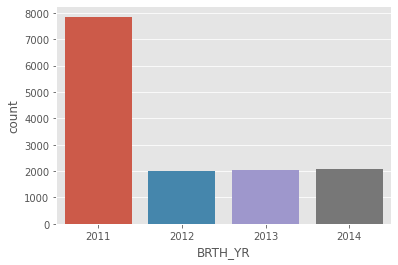

In [7]:
# The high years repeat

plt.style.use("ggplot") # just I want using style - ggplot- when I visualisation the data

sns.countplot(df["BRTH_YR"])

### We see the high years *2011*

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GNDR', ylabel='count'>

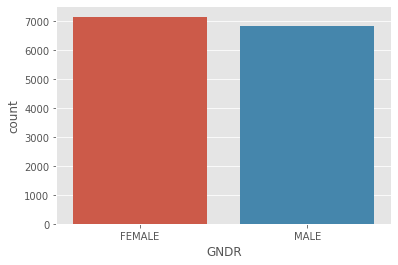

In [8]:
# About the gender , 

sns.countplot(df["GNDR"])

In [9]:
df["GNDR"].value_counts(normalize=True)*100 #percentage

FEMALE    51.131643
MALE      48.868357
Name: GNDR, dtype: float64

### Almost the similar [ Female 51 % , Male 49 %]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


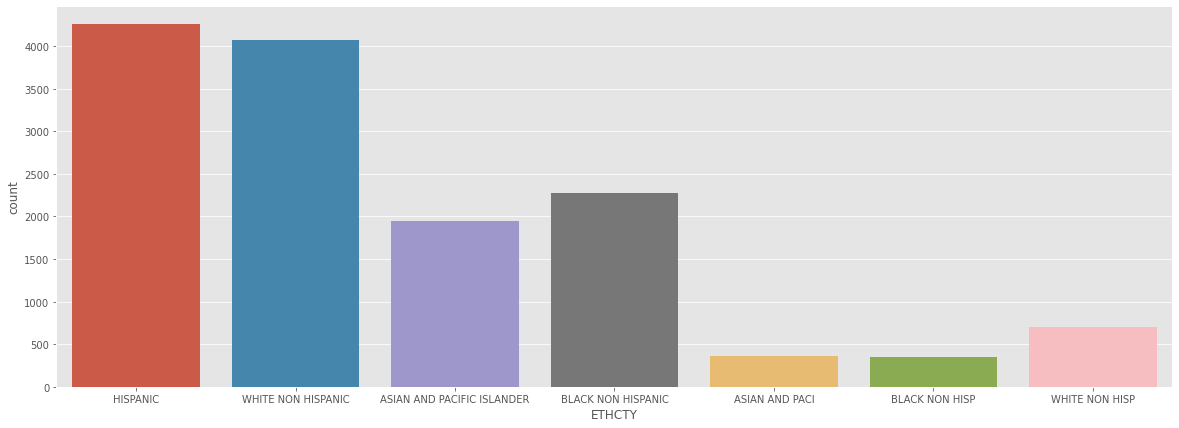

In [10]:
# about the Ethnicity , who high repeat ?

plt.figure(figsize=(20,7))
sns.countplot(df["ETHCTY"])
plt.show()

In [11]:
df["ETHCTY"].value_counts(normalize=True)*100 #percentage

HISPANIC                      30.468414
WHITE NON HISPANIC            29.150551
BLACK NON HISPANIC            16.287065
ASIAN AND PACIFIC ISLANDER    13.980805
WHITE NON HISP                 5.020771
ASIAN AND PACI                 2.564103
BLACK NON HISP                 2.528291
Name: ETHCTY, dtype: float64

### The high repeat about Ethnicity [ HISPANIC or WHITE NON HISPANIC ] we see how the percentage above

## Let`s make interactive  Graph about the DataSet


In [12]:
# first using scatter plot , make comparison  between CNT & Rank also the year and gender

px.scatter(df,x="CNT",y="RNK",animation_frame="BRTH_YR",color="GNDR",title="Comparison [ CNT & RNK ] and Year , Gender")

## We see the different between count of the name and ranking of the name , using filter years and gender

In [13]:
# let`s make - Pie chart interactive between [ Years , Gender ,Ethnicity ] with the Rank ,

px.sunburst(df,values="RNK",path=["BRTH_YR","ETHCTY"],hover_name="GNDR",height=700,title="Pie chart interactive between [ Years , Gender ,Ethcty ] with the Rank ")

### when you press on the years , will see the details

# Now , making Group_by , we want how much repeat in the DataSet

In [14]:
# group by about the data 
gr=df.groupby(["BRTH_YR","GNDR","ETHCTY"])["NM"].count() # gr the name new a variable
gr  #print

BRTH_YR  GNDR    ETHCTY                    
2011     FEMALE  ASIAN AND PACIFIC ISLANDER     624
                 BLACK NON HISPANIC             736
                 HISPANIC                      1296
                 WHITE NON HISPANIC            1360
         MALE    ASIAN AND PACIFIC ISLANDER     604
                 BLACK NON HISPANIC             800
                 HISPANIC                      1176
                 WHITE NON HISPANIC            1256
2012     FEMALE  ASIAN AND PACI                 179
                 BLACK NON HISP                 171
                 HISPANIC                       302
                 WHITE NON HISP                 371
         MALE    ASIAN AND PACI                 179
                 BLACK NON HISP                 182
                 HISPANIC                       290
                 WHITE NON HISP                 330
2013     FEMALE  ASIAN AND PACIFIC ISLANDER     175
                 BLACK NON HISPANIC             181
                 HIS

- The high repeat at year 2011

<AxesSubplot:xlabel='BRTH_YR,GNDR,ETHCTY'>

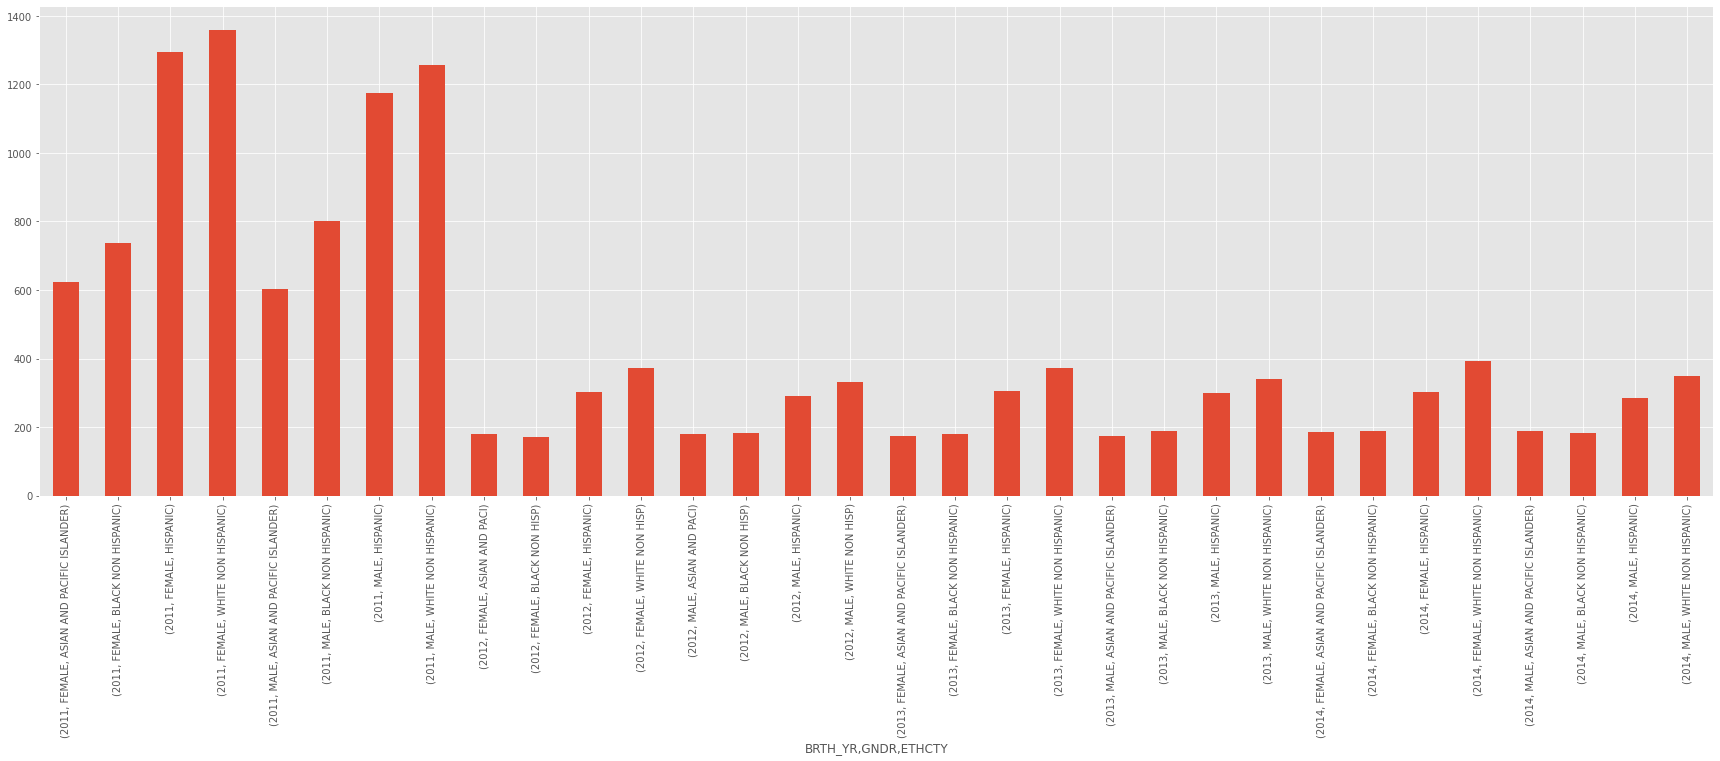

In [15]:
gr.plot(kind='bar',figsize=(30,9)) # visualization the group by

## Some of summary about this graph , ( the high two Ethnicity repeat )
### 2011     
 - Female  -  hispanic  &  white non hispanic                                 
 - Male    -  hispanic  &  white non hispanic                              

### 2012   
 - Female  -  hispanic  &  white non hisp     
 - Male    -  hispanic  &  white non hisp         

### 2013     
 - Female  -  hispanic  &  white non hispanic    
 - Male    -  hispanic  &  white non hispanic             

### 2014    
 - Female  -  hispanic  &  white non hispanic             
 - Male    -  hispanic  &  white non hispanic   


## Now , Let see the high  five names repeat 

In [16]:
df["NM"].value_counts().unique

<bound method Series.unique of DYLAN       29
ARIEL       26
RILEY       25
RYAN        25
JORDAN      22
            ..
CAMILO       1
DENZEL       1
Manha        1
Boubacar     1
Yisrael      1
Name: NM, Length: 2811, dtype: int64>

## The name [ DYLAN  - ARIEL -  RILEY  - RYAN   - JORDAN ]

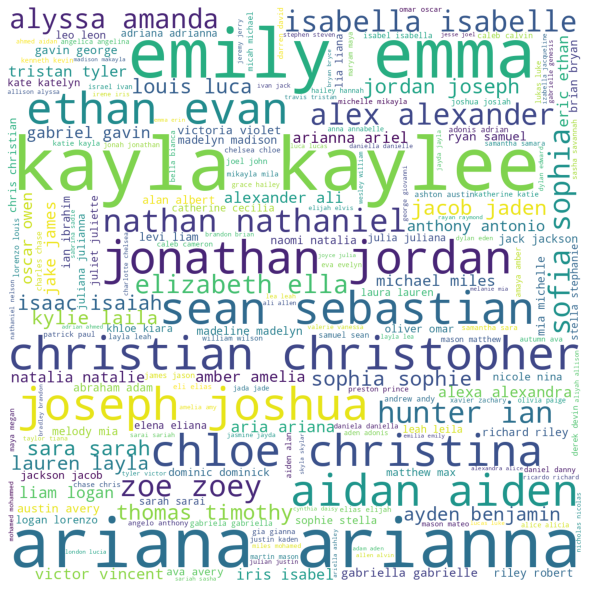

In [17]:
#in the graph
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.NM:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Let make filter ( Years , Gender , ETHNICITY )

In [18]:
df_Female=df[(df["GNDR"]=="FEMALE")] #filter about female
df_male=df[(df["GNDR"]=="MALE")]     #filter about male

In [19]:
df_Female["NM"].value_counts().unique

<bound method Series.unique of MAYA       20
JASMINE    20
KAYLA      20
KAYLEE     20
LAUREN     20
           ..
LIVIA       1
LOUISA      1
MAE         1
MARGOT      1
Yasmine     1
Name: NM, Length: 1512, dtype: int64>

### the high five names female repeat [ MAYA - JASMINE - KAYLA - KAYLEE - LAUREN ]

In [20]:
df_male["NM"].value_counts().unique

<bound method Series.unique of ZACHARY     20
TYLER       20
NOAH        20
ISAAC       20
IAN         20
            ..
ARCHER       1
Kameron      1
ATTICUS      1
BENTZION     1
Yisrael      1
Name: NM, Length: 1339, dtype: int64>

### the high five names male repeat [ZACHARY - TYLER -  NOAH - ISAAC -  IAN ]

In [21]:
#filter about the years 

df_2011=df[(df["BRTH_YR"]==2011)]  #filter 2011
df_2012=df[(df["BRTH_YR"]==2012)]  #filter 2012
df_2013=df[(df["BRTH_YR"]==2013)]  #filter 2013
df_2014=df[(df["BRTH_YR"]==2014)]  #filter 2014

In [22]:
df_2011["NM"].value_counts().unique

<bound method Series.unique of DYLAN       24
RILEY       20
RYAN        20
ARIEL       20
SAMANTHA    16
            ..
MUHAMMAD     4
RICKY        4
ROHAN        4
STANLEY      4
ZEV          4
Name: NM, Length: 1206, dtype: int64>

## the high five names at 2011 [  DYLAN  - RILEY - RYAN  - ARIEL - SAMANTHA]

In [23]:
df_2012["NM"].value_counts().unique

<bound method Series.unique of JORDAN      6
ARIEL       6
AVERY       6
DYLAN       5
RYAN        5
           ..
GOLDY       1
GRETA       1
HADASSAH    1
HADLEY      1
ZEV         1
Name: NM, Length: 1208, dtype: int64>

## the high five names at 2012 [ JORDAN  - ARIEL -  AVERY  - DYLAN -  RYAN ]

In [24]:
df_2013["NM"].value_counts().unique

<bound method Series.unique of Avery     8
Riley     6
Dylan     5
Jordan    5
Ariel     5
         ..
Hazel     1
Helena    1
Henny     1
Hinda     1
Zev       1
Name: NM, Length: 1227, dtype: int64>

## the high five names at 2013 [ Avery - Riley - Dylan - Jordan - Ariel ]

In [25]:
df_2014["NM"].value_counts().unique

<bound method Series.unique of Riley    8
Avery    6
Ariel    6
Dylan    5
Logan    5
        ..
Hinda    1
Hindy    1
Isla     1
Jana     1
Zev      1
Name: NM, Length: 1241, dtype: int64>

## the high five names at 2014 [ Riley - Avery -  Ariel -  Dylan - Logan ]

In [26]:
# filter about ETHCTY / HISPANIC & WHITE NON HISPANIC because highest repetition

df_spa=df[(df["ETHCTY"]=="HISPANIC")]
df_white=df[(df["ETHCTY"]=="WHITE NON HISPANIC")]

In [27]:
df_spa["NM"].value_counts().unique

<bound method Series.unique of ARIEL        10
RILEY         9
TAYLOR        8
AVERY         6
GERALDINE     5
             ..
Malia         1
Maite         1
Luz           1
Leanna        1
Zayden        1
Name: NM, Length: 1372, dtype: int64>

## the high five names Ethnicity = HISPANIC [ ARIEL  - RILEY  - TAYLOR -  AVERY - GERALDINE ]

In [28]:
df_white["NM"].value_counts().unique

<bound method Series.unique of CHARLIE    8
QUINN      8
RILEY      8
CAMERON    8
PARKER     8
          ..
Alexia     1
Vanessa    1
Valerie    1
Yanky      1
Yisrael    1
Name: NM, Length: 1455, dtype: int64>

## the high five names Ethnicity = WHITE NON HISPANIC   [  CHARLIE  - QUINN -  RILEY -  CAMERON - PARKER ] 

# Abstract

##  Some analysis and more frequent names showed.
### show now the high five name repeat :

### All the Data 
- The name [ DYLAN - ARIEL - RILEY - RYAN - JORDAN ] 
### *******************************************

### All the  Female 

- The name [ MAYA - JASMINE - KAYLA - KAYLEE - LAUREN 

### All the  Male
- The name  [ZACHARY - TYLER - NOAH - ISAAC - IAN 
### **************************

### Filter the Years 
### at 2011 
- The name [ DYLAN - RILEY - RYAN - ARIEL - SAMANTHA]


### at 2012
- The name [ JORDAN - ARIEL - AVERY - DYLAN - RYAN 


### at 2013
 - The name [ Avery - Riley - Dylan - Jordan - Ariel ]

### at 2014 
- The name [ Riley - Avery - Ariel - Dylan - Logan ]

### *************************
## Ethnicity 

### HISPANIC 
- The name [ ARIEL - RILEY - TAYLOR - AVERY - GERALDINE ]

### WHITE NON HISPANIC
 - The name [ CHARLIE - QUINN - RILEY - CAMERON - PARKER ]



# -----------------------   The End   ----------

### Thank for reading my analysis , if you any questions or advice me please write in the comment , also if you liked my analysis vote me ,